# Importing necessary libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import seaborn as sns

# Getting our dataset and viewing what the dataset is all about...

In [3]:
from sklearn.datasets import load_iris
df = load_iris()
print("Type of our dataframe is: ",type(df),"\n")
# Our loaded df is a dictionary of key value mappings....
print(df.keys(),"\n")
print(df['DESCR'])
print('\nIndependent variables of our dataset are: ',df['feature_names'])
print('\nTarget variables of our dataset are: ',df['target_names'])
# Checking whether our target values are continuous or not....
print('\nTarget values are: ',df['target'])

Type of our dataframe is:  <class 'sklearn.utils.Bunch'> 

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename']) 

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.

In [4]:
iris_df = pd.DataFrame(df.data, columns=df['feature_names'])
#iris_df['Iris type'] = df['target']
iris_df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [5]:
# Step 1: To standardize our data.
# This is an important step because we don't want our PCA to always select high range values
# since there might be a wide gap between our initial range of data values..
# Creating a StandardScaler obj.
scaler = StandardScaler() 
# fitting our data in the scaler obj.
scaler.fit(iris_df)
# Now, transforming our data into scaled data where the values are standardised...
scaled_data = scaler.transform(iris_df)
print(type(scaled_data))
scaled_df = pd.DataFrame(scaled_data, columns=df['feature_names'])
scaled_df.head(10)

<class 'numpy.ndarray'>


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,-0.900681,1.019004,-1.340227,-1.315444
1,-1.143017,-0.131979,-1.340227,-1.315444
2,-1.385353,0.328414,-1.397064,-1.315444
3,-1.506521,0.098217,-1.283389,-1.315444
4,-1.021849,1.249201,-1.340227,-1.315444
5,-0.537178,1.939791,-1.169714,-1.052180
6,-1.506521,0.788808,-1.340227,-1.183812
7,-1.021849,0.788808,-1.283389,-1.315444
8,-1.748856,-0.362176,-1.340227,-1.315444
9,-1.143017,0.098217,-1.283389,-1.447076


In [6]:
# Creating a PCA object...
# We want to reduce our 4-dimensional data into 2d data....
# Number of features(components) to be kept ... if nothing is specified then it keeps all the features
pca = PCA(n_components=2)
# Fitting our standardised(scaled data) into our pca model.
pca.fit(scaled_data)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [7]:
# Transforming the data into n_component model...
after_PCA = pca.transform(scaled_data)

In [8]:
# Checking shape of data to see whether PCA reduced the dimensionality....
print('Shape of data before PCA transform: ',scaled_data.shape)
print('Shape of data after PCA transform: ',after_PCA.shape)

Shape of data before PCA transform:  (150, 4)
Shape of data after PCA transform:  (150, 2)


In [9]:
# So our PCA has transformed the data into 2 featured model....
# So, the object is basically a numpy-array
print(type(after_PCA))

<class 'numpy.ndarray'>


Text(0.5, 1.0, 'PCA 1 vs PCA 2')

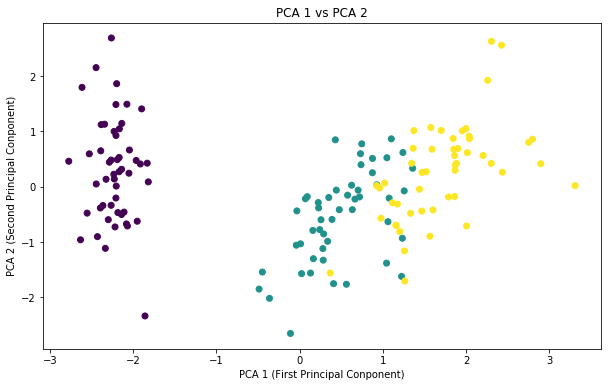

In [10]:
# Visualizing our PCA components 
plt.figure(figsize=(10,6))
# Plotting a scatter plot and colored as per our target variables
# So, we grab all rows and 1st column as X and plot it against all rows and 2nd column as Y..
plt.scatter(after_PCA[:,0], after_PCA[:,1], c=df['target'])
plt.xlabel('PCA 1 (First Principal Conponent)')
plt.ylabel('PCA 2 (Second Principal Conponent)')
plt.title('PCA 1 vs PCA 2')

In [11]:
# The components correspond to combination of original features i.e attributes of PCA object...
# Each row represent one principal component 
# Each column related original features
pca.components_

array([[ 0.52106591, -0.26934744,  0.5804131 ,  0.56485654],
       [ 0.37741762,  0.92329566,  0.02449161,  0.06694199]])

In [12]:
component_df = pd.DataFrame(pca.components_, columns=df['feature_names'])
component_df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,0.521066,-0.269347,0.580413,0.564857
1,0.377418,0.923296,0.024492,0.066942


In [13]:
component_df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,2.000000,2.000000,2.000000,2.000000
mean,0.449242,0.326974,0.302452,0.315899
std,0.101575,0.843326,0.393096,0.352079
min,0.377418,-0.269347,0.024492,0.066942
25%,0.413330,0.028813,0.163472,0.191421
50%,0.449242,0.326974,0.302452,0.315899
75%,0.485154,0.625135,0.441433,0.440378
max,0.521066,0.923296,0.580413,0.564857


In [14]:
# Reconstructing to our dataset instances using PCA components...
# This is done by multiplying (Transpose of feature vector) vs (transpose of std. data set)
recons_df = pd.DataFrame(np.dot(after_PCA[:,:2],pca.components_[:2,:]), columns=df['feature_names'])
recons_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,-0.998889,1.053198,-1.302707,-1.247098
1,-1.338748,-0.061923,-1.224328,-1.220572
2,-1.360961,0.321117,-1.380603,-1.358338
3,-1.423598,0.067762,-1.349224,-1.338813
4,-1.001138,1.240918,-1.371254,-1.306618


# Split our PCA transformed data into Train & Test Data

In [15]:
X = scaled_df.values
y = df.target
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3, random_state=1)
print('X_train shape: ',X_train.shape)
print('y_train shape: ',y_train.shape)
print('X_test shape: ',X_test.shape)
print('y_test shape: ',y_test.shape)

X_train shape:  (105, 4)
y_train shape:  (105,)
X_test shape:  (45, 4)
y_test shape:  (45,)


In [16]:
from sklearn.linear_model import LogisticRegression

In [17]:
lgr = LogisticRegression()
lgr.fit(X_train,y_train)
pred = lgr.predict(X_test)
pred

C:\Users\DELL\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\DELL\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


array([0, 1, 1, 0, 2, 2, 2, 0, 0, 2, 1, 0, 2, 2, 2, 0, 1, 2, 0, 0, 1, 2,
       2, 0, 2, 1, 0, 0, 1, 2, 2, 2, 1, 2, 2, 0, 1, 0, 1, 2, 2, 0, 1, 2,
       1])

In [23]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [24]:
print(accuracy_score(y_test,pred))
print(classification_report(y_test, pred))
print(confusion_matrix(y_test,pred))

0.8222222222222222
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       0.92      0.61      0.73        18
           2       0.63      0.92      0.75        13

   micro avg       0.82      0.82      0.82        45
   macro avg       0.85      0.84      0.83        45
weighted avg       0.86      0.82      0.82        45

[[14  0  0]
 [ 0 11  7]
 [ 0  1 12]]


In [25]:
# Withour using PCA, we got an accuracy of 88.88%, but with PCA we get an accuracy of 82.22%
# This means all the initial features contribute equally to the estimation...